Let's continue the work in this notebook, due to the github submitting issues


Loading the dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import pearsonr, f_oneway, spearmanr
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
Loan_Export_dataset=pd.read_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/MyNewdata.csv')

<ipython-input-5-5fdab7af5290>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  Loan_Export_dataset=pd.read_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/MyNewdata.csv')


In [ ]:
Loan_Export_dataset

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266452,839,1999-03-01,N,2029-02-01,37964,0,1,O,60,32,90000,60,7.000,R,N,FRM,PA,SF,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
266453,840,2002-10-01,N,2029-04-01,35644,0,1,O,73,0,267000,73,6.375,C,N,FRM,NY,SF,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
266454,840,2003-04-01,N,2029-04-01,42044,0,1,O,73,31,87000,73,5.625,R,N,FRM,CA,SF,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
266455,845,1999-04-01,N,2029-03-01,37964,0,1,I,80,54,88000,80,7.000,R,N,FRM,PA,SF,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32


In [ ]:
Loan_Export_dataset['FirstPaymentDate'] = pd.to_datetime(Loan_Export_dataset['FirstPaymentDate'])
Loan_Export_dataset['MaturityDate'] = pd.to_datetime(Loan_Export_dataset['MaturityDate'])

### Temporal trends

The variation of number of loans in terms of years:

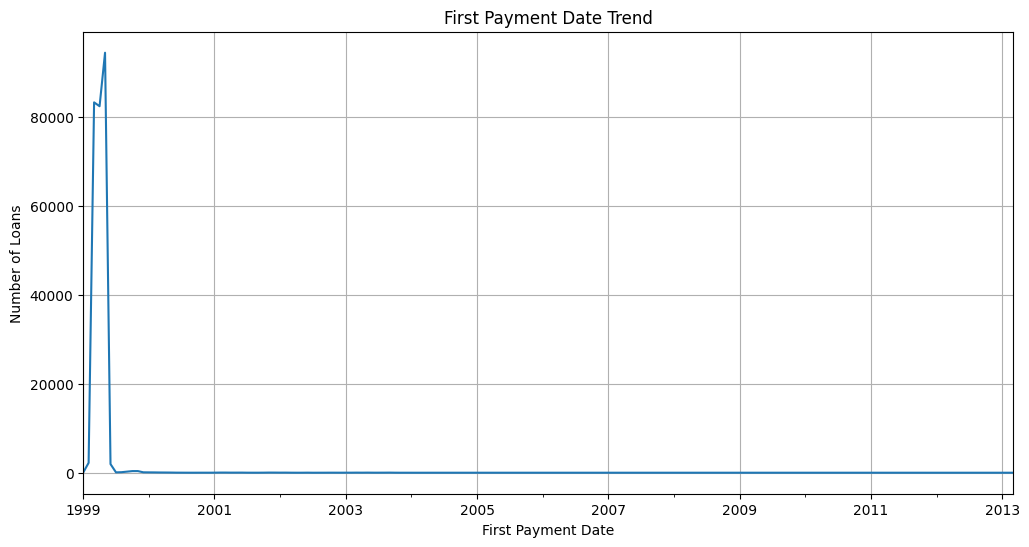

In [ ]:
plt.figure(figsize=(12, 6))
Loan_Export_dataset['FirstPaymentDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
plt.title('First Payment Date Trend')
plt.xlabel('First Payment Date')
plt.ylabel('Number of Loans')
plt.grid(True)
plt.show()


Number of loans vs Maturity date

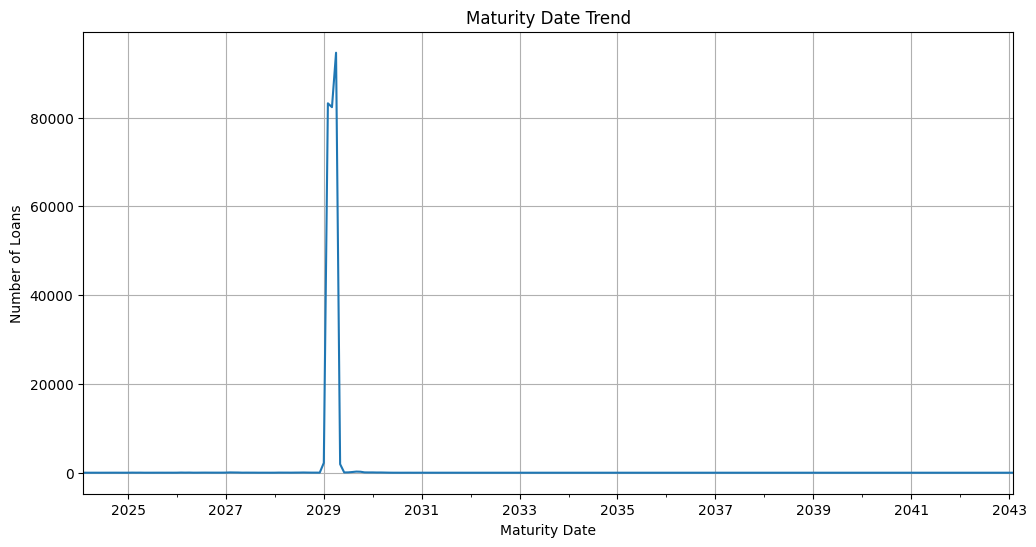

In [ ]:
plt.figure(figsize=(12, 6))
Loan_Export_dataset['MaturityDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
plt.title('Maturity Date Trend')
plt.xlabel('Maturity Date')
plt.ylabel('Number of Loans')
plt.grid(True)
plt.show()


Distribution Of original loan term

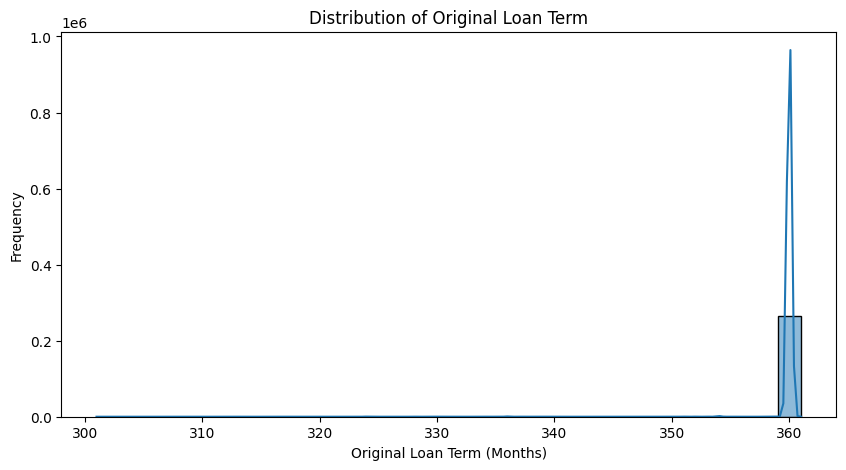

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(Loan_Export_dataset['OrigLoanTerm'], bins=30, kde=True)
plt.title('Distribution of Original Loan Term')
plt.xlabel('Original Loan Term (Months)')
plt.ylabel('Frequency')
plt.show()


Intreste rate variation in terms of years

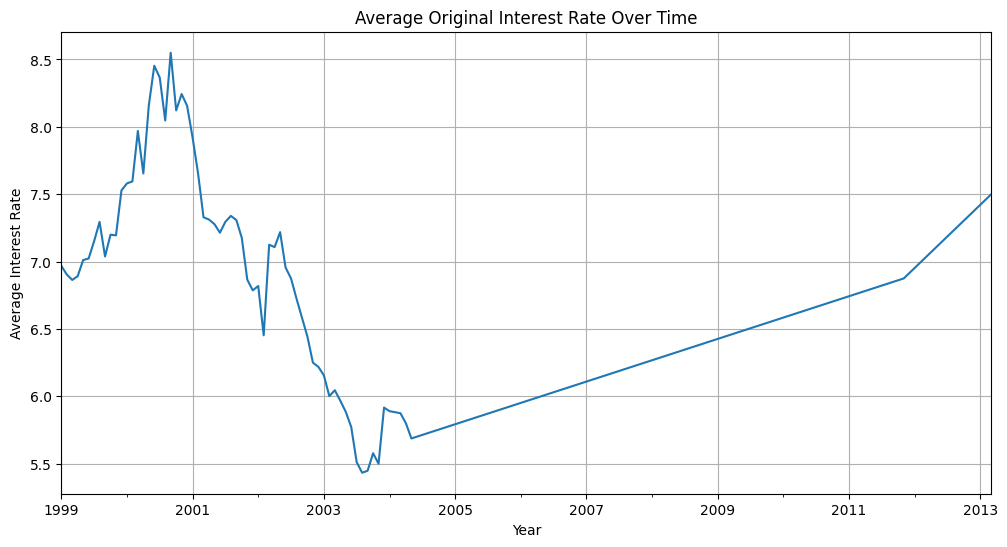

In [ ]:
Loan_Export_dataset.groupby(Loan_Export_dataset['FirstPaymentDate'].dt.to_period('M'))['OrigInterestRate'].mean().plot(kind='line', figsize=(12, 6))
plt.title('Average Original Interest Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Average Interest Rate')
plt.grid(True)
plt.show()


Loan purpos variation over time

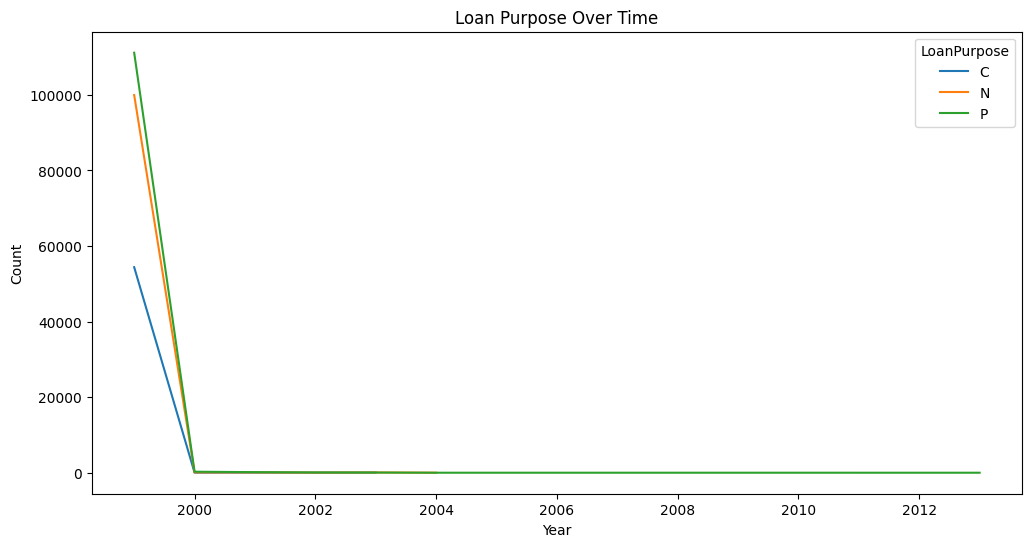

In [ ]:
Loan_Export_dataset.groupby(Loan_Export_dataset['FirstPaymentDate'].dt.year)['LoanPurpose'].value_counts().unstack().plot(kind='line', figsize=(12, 6))
plt.title('Loan Purpose Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


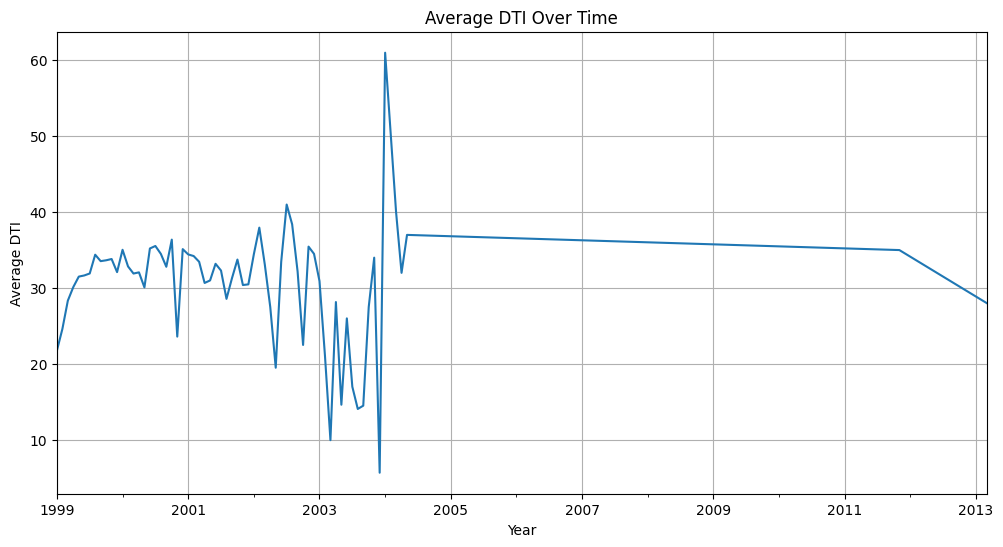

In [ ]:
Loan_Export_dataset.groupby(Loan_Export_dataset['FirstPaymentDate'].dt.to_period('M'))['DTI'].mean().plot(kind='line', figsize=(12, 6))
plt.title('Average DTI Over Time')
plt.xlabel('Year')
plt.ylabel('Average DTI')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


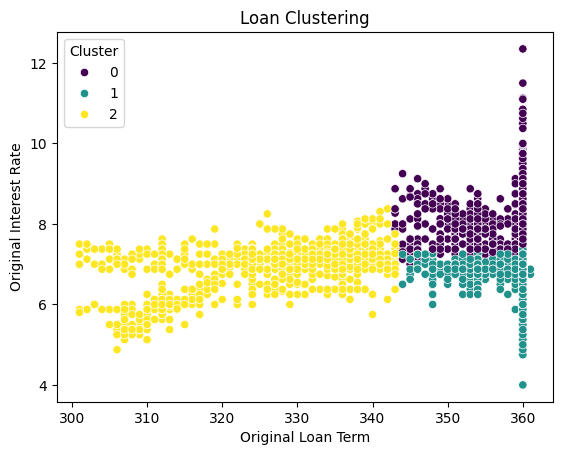

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = Loan_Export_dataset[['OrigLoanTerm', 'OrigInterestRate', 'CreditScore']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
Loan_Export_dataset['Cluster'] = kmeans.fit_predict(scaled_features)

sns.scatterplot(data=Loan_Export_dataset, x='OrigLoanTerm', y='OrigInterestRate', hue='Cluster', palette='viridis')
plt.title('Loan Clustering')
plt.xlabel('Original Loan Term')
plt.ylabel('Original Interest Rate')
plt.show()


Cluster 0  High Loan Term and High Interest Rate:

- This cluster mostly includes loans with the longest terms (near 360 months).
The interest rates in this cluster are relatively high, indicating riskier loans or those taken out during periods of higher interest rates.

Cluster 1 High Loan Term and Low Interest Rate:

- Loans in this cluster also have a term around 360 months, similar to Cluster 0.
However, these loans have lower interest rates, possibly indicating less risky loans, loans taken during periods of lower interest rates, or loans for borrowers with better credit profiles.

Cluster 2 Moderate Loan Term and Varied Interest Rate:

- Loans in this cluster have shorter terms compared to the other two, typically between 300 to 340 months.
The interest rates are spread across a wider range but are generally lower than those in Cluster 0.
This might include loans with specific borrower criteria or those negotiated during a period with varying interest rates.

### Visualizing the geographic data in terms of loans, intrest rate, credit score, LTV and OrigUPB

In [ ]:
Loan_Export_dataset.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment', 'Cluster'],
      dtype='object')

We want to see  the numbers of loans in each state

<ipython-input-9-8dea6e61cebe>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LoanCount', y='PropertyState', data=top_msa_data, palette='coolwarm')


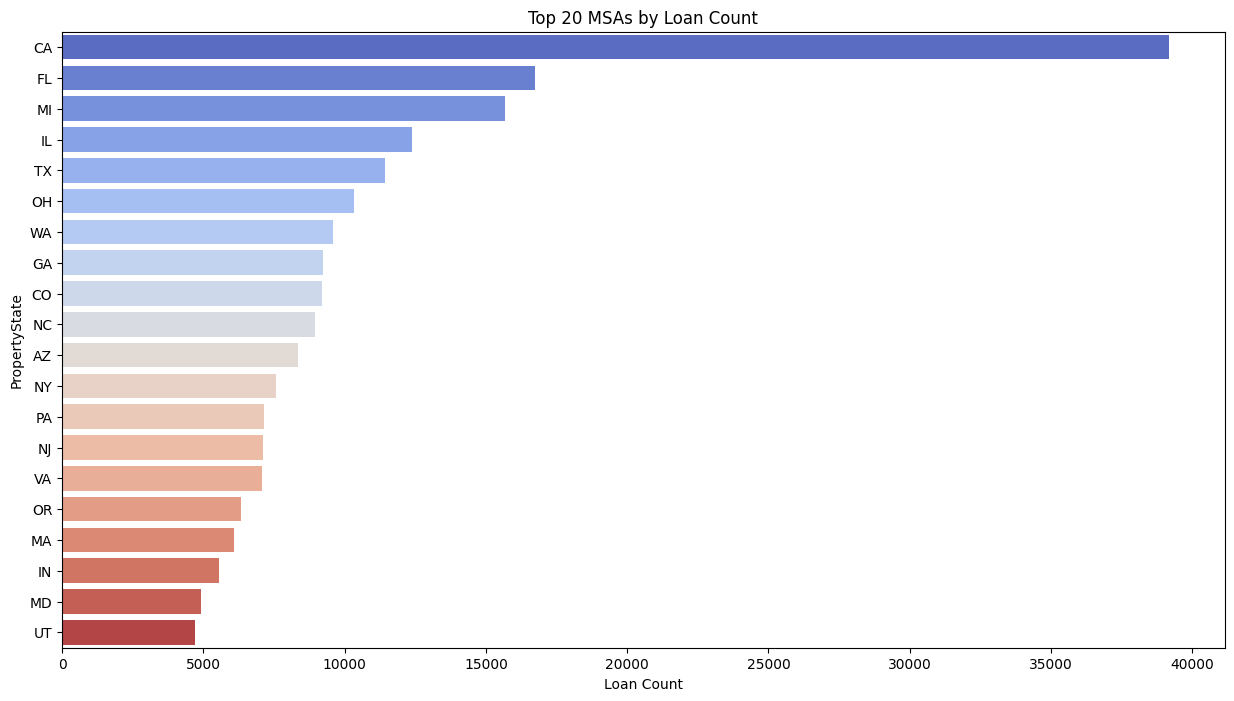

In [ ]:
msa_data = Loan_Export_dataset.groupby('PropertyState').agg({
    'LoanSeqNum': 'count',
    'OrigInterestRate': 'mean',
    'CreditScore': 'mean',
    'LTV': 'mean',
    'OrigUPB': 'sum'
}).reset_index()

msa_data.columns = ['PropertyState', 'LoanCount', 'AvgInterestRate', 'AvgCreditScore', 'AvgLTV', 'TotalOrigUPB']

plt.figure(figsize=(15, 8))
top_msa_data = msa_data.sort_values('LoanCount', ascending=False).head(20)  # Show top 20 MSAs
sns.barplot(x='LoanCount', y='PropertyState', data=top_msa_data, palette='coolwarm')
plt.title('Top 20 MSAs by Loan Count')
plt.xlabel('Loan Count')
plt.ylabel('PropertyState')
plt.show()

### Multivariate analysis

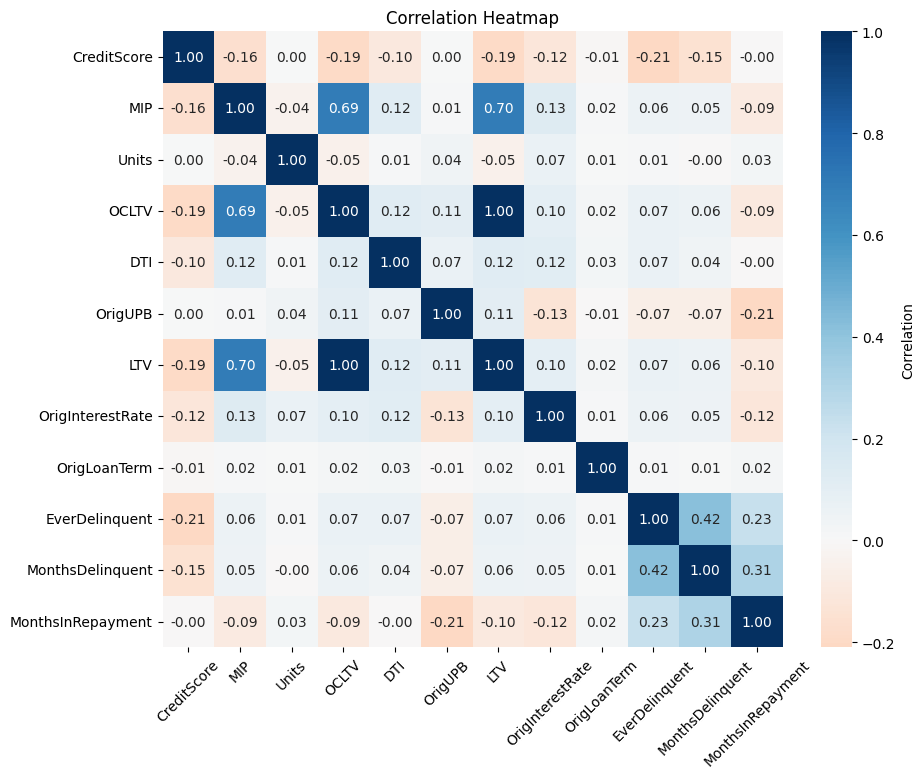

In [ ]:

numerical_features = Loan_Export_dataset.select_dtypes(include=['int64', 'float64']).columns
# Calculate the correlation matrix
numerical_df = Loan_Export_dataset[numerical_features]
correlation_matrix = numerical_df.corr()

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as needed
sns.heatmap(
    correlation_matrix,
    annot=True,  # Annotate cells with the numeric value
    cmap='RdBu',  # Color map
    center=0,  # Center the color scale at zero
    fmt=".2f",  # Format the annotation text
    cbar_kws={'label': 'Correlation'}  # Colorbar label
)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()


Results:
- MIP and OCLTV, LTV: These are strongly positively correlated, indicating that as the Mortgage Insurance Premium increases, the Loan-to-Value ratios also tend to increase.
- EverDelinquent, MonthsDelinquent, and MonthsInRepayment: These are positively correlated with each other, showing that if a loan has ever been delinquent, it is likely to have more months delinquent and more months in repayment.
- CreditScore: Negatively correlated with EverDelinquent, indicating that higher credit scores are associated with fewer delinquencies.
- OrigInterestRate: Slightly negatively correlated with CreditScore and LTV, suggesting that lower credit scores and higher LTV ratios may result in higher interest rates.

Perform dimensionality reduction techniques for that we will use PCA

In [ ]:
Loan_Export_dataset.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment', 'Cluster'],
      dtype='object')

Applying PCA on numerical data

In [ ]:
numerical_cols = ['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment']
numerical_data = Loan_Export_dataset[numerical_cols]

# Step 2: Standardize the numerical data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Step 3: Apply PCA
pca = PCA(n_components=2)  # Number of components can be adjusted
pca_results = pca.fit_transform(numerical_data_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_results, columns=[f'PC{i+1}' for i in range(pca_results.shape[1])])

# Combine PCA results with the original data if needed
combined_df = pd.concat([Loan_Export_dataset.reset_index(drop=True), pca_df], axis=1)

combined_df.head()


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Cluster,PC1,PC2
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,0,-1.441104,-0.536466
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,0,1.177192,0.495181
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,0,0.782831,-0.207294
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,0,0.562021,-0.950408
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,0,0.389587,-0.417033


The PCA has reduced the dimensionality of the data to two principal components (PC1 and PC2):

- PC1: The first principal component, capturing the largest variance in the data.
- PC2: The second principal component, capturing the second largest variance orthogonal to PC1.


In [ ]:
combined_df.to_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/combined_df.csv',index=False)